Following the tensor flow tutorial https://www.tensorflow.org/text/tutorials/text_classification_rnn.

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

In [114]:
df = pd.read_csv("clean.csv")
df.drop(df.columns[[0]], axis = 1, inplace = True)
df.head()

,body,score,target
0,"Hiethcliff, Garfield..?",1,0
1,That looks like a Garfield,1,0
2,Tell it to pick up some weights or gloves… no ...,1,0
3,Please put him on a diet now or he will die wa...,1,0
4,I bet this dad never agreed to have a dog in t...,1,0


In [178]:
X = df['body']
y = df['target']

In [179]:
y = LabelBinarizer().fit_transform(y)

In [180]:
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1 - train_ratio, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(X_train, X_val, X_test)

6954     To be fair pizza would provide a lot more supp...
9851     Yes:(. That’s anxiety for you!!!!  It’s so awf...
7140     So the therapist had the same question. Basica...
3083     Hey /u/Proud_Midnight_6070! Thank you for your...
874                                  That’s a baby tortie!
                               ...                        
4365     The constant yo-yoing is really what makes me ...
10026                         wow, I miss going to one. :)
1076                       Koala bears and wallabies, dude
4801     Had to stop studying and working. My brain is ...
8150     She fixed me, then she broke me. It hurts so m...
Name: body, Length: 10095, dtype: object 5235     Unless it is really heart-rending music, and t...
5142     I recently got fired (my dad would say "dismis...
7946     I FEEL YOU\n\nSO MUCH\n\nomg\n\nThere were tim...
9497     Thank you.. and I wish I could take that time ...
4751                              I only love that part. 😆
               

In [181]:
CV = CountVectorizer(stop_words='english', strip_accents = 'ascii')
X_train_counts = CV.fit_transform(X_train)
TFT = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train = TFT.transform(X_train_counts)
X_val = CV.transform(X_val)
X_test = CV.transform(X_test)
X_train = X_train.toarray()
X_val.toarray()
X_test = X_test.toarray()

In [182]:
X_train.shape ,y_train.shape,X_val.shape, y_val.shape, X_test.shape, y_test.shape

((10095, 15792),
 (10095, 3),
 (2019, 15792),
 (2019, 3),
 (1346, 15792),
 (1346, 3))

In [195]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [198]:
input_dim = X_train.shape[1]
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_dim=input_dim, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

In [199]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [200]:
history = model.fit(X_train, y_train, epochs=25,validation_data=(X_val, y_val),batch_size=128,verbose=False)

In [201]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_val, y_val, verbose=False)
print("Validation Accuracy:  {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Test Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9859
Validation Accuracy:  0.6691
Test Accuracy:  0.6701


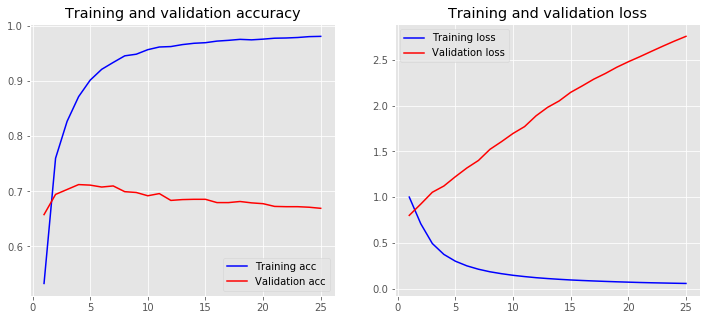

In [202]:
plot_history(history)

In [197]:
tf.keras.backend.clear_session()